In [50]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

In [51]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

"""# Padronização
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)"""

'# Padronização\nmin_values = X.min(axis=0)\nmax_values = X.max(axis=0)\nX = (X - min_values) / (max_values - min_values)'

In [52]:
data = pd.read_csv('Reconhecimento-de-digitos-ML-2023.2/Projeto 2.1/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [53]:
# Retirando a coluna de tempo
data = data.drop('Time', axis=1)
print(data['Class'].value_counts())
# Eu possuo 284315 valores de classe 0 e 492 valores de classe 1. Deixe os valores iguais
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64
Class
1    492
0    492
Name: count, dtype: int64


In [54]:
X = np.array(normal_distributed_data.drop('Class', axis=1))
Y = np.array(normal_distributed_data['Class'])
RANDOM_STATE = 2
BATCH_SIZE = 32

# Normalizando os dados
X = padronizar_normal(X)

In [55]:
# Separando em dados de treino, teste e validação
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


In [56]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.9967741935483871

In [57]:
# Criando a rede neural
model = Sequential()
# Adicionando neurônios em uma camada oculta
model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='tanh')) #quantidade de neuronios na camada escondida, nº de features

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# adicionando a taxa de aprendizado

# Compilando o modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
#Treinando a rede neural
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8470 - loss: 0.6827 - val_accuracy: 0.8038 - val_loss: 0.6783
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.6727 - val_accuracy: 0.8354 - val_loss: 0.6650
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.6558 - val_accuracy: 0.8228 - val_loss: 0.6491
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8695 - loss: 0.6395 - val_accuracy: 0.8354 - val_loss: 0.6325
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 0.6179 - val_accuracy: 0.8418 - val_loss: 0.6161
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8774 - loss: 0.6027 - val_accuracy: 0.8544 - val_loss: 0.6006
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8810 - loss: 0.5877 - val_accuracy: 0.8608 - val_loss: 0.5859
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8754 - loss: 0.5725 - val_accuracy: 0.8671 - 

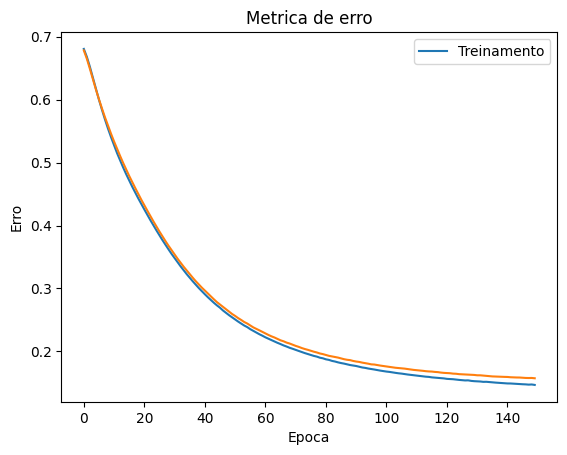

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  

--> Acuracia (treino): 0.9571
--> Acuracia (validacao): 0.9494
--> acc_train - acc_val = 0.0077
Agora a validação:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [

In [59]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(Y_train, pred)

pred_val = np.round(model.predict(X_val))
acc_val = accuracy_score(Y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
pred_np = np.array(pred)
# encontrando os valores unicos de pred_np
unique, counts = np.unique(pred_np, return_counts=True)
dict(zip(unique, counts))
# exibindo esses valores unicos
print('Agora a validação:')
print(pred_val)

In [60]:
#descobrindo quantos valores unicos existem em pred_val
valores, contagens = np.unique(pred_val, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))

resultados


array([[ 0., 82.],
       [ 1., 76.]])

In [61]:
valores, contagens = np.unique(Y_val, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[ 0, 78],
       [ 1, 80]], dtype=int64)